# Grammatical Error Correction
1 - Data Pre-processing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Necessary Librarires
import re
import unicodedata
import spacy
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#untar the tar file
!tar -xvf /content/drive/MyDrive/lang8.bea19.tar.gz

lang8.train.auto.bea19.m2
lang8_to_m2.py
readme.txt


In [ ]:
with open('lang8.train.auto.bea19.m2') as f: #lang8.train.auto.bea19.m2
  data = f.readlines()

In [ ]:
print("number of lines in data")
print(len(data))

number of lines in data
4015882


In [ ]:
m2 = open('lang8.train.auto.bea19.m2').read().strip().split("\n\n")
out = open('corrected.txt', "w")
in_ = open('error.txt', "w")
# Do not apply edits with these error types
skip = {"noop", "UNK", "Um"}

for sent in tqdm(m2):
  #print(sent)
  sent = sent.split("\n")
  cor_sent = sent[0].split()[1:] # Ignore "S "

  in_.write(" ".join(sent[0].split()[1:])+"\n" )
  #print('ORIGINAL',sent[0].split()[1:])

  edits = sent[1:]
  offset = 0
  for edit in edits:
    edit = edit.split("|||")
    if len(edit) < 2:
      continue
    if edit[1] in skip: continue # Ignore certain edits
    coder = int(edit[-1])
    if coder != 0: continue # Ignore other coders
    span = edit[0].split()[1:] # Ignore "A "
    start = int(span[0])
    end = int(span[1])
    cor = edit[2].split()
    cor_sent[start+offset:end+offset] = cor
    offset = offset-(end-start)+len(cor)

  #print('CORRECT',cor_sent)
  out.write(" ".join(cor_sent)+"\n")

100%|██████████| 1037561/1037561 [00:09<00:00, 113745.98it/s]


In [ ]:
with open('corrected.txt') as f:
  correct_data = f.read()

with open('error.txt') as f:
  error_data = f.read()

In [ ]:
final_data = pd.DataFrame(columns = ['error', 'correct'])

final_data['correct'] = correct_data.split('\n')
final_data['error'] = error_data.split('\n')[:len(final_data['correct'])]

In [ ]:
final_data.describe()

,error,correct
count,1037562,1037562
unique,943962,937964
top,URL,URL
freq,2765,2762


In [ ]:
pd.options.display.max_colwidth = 600
final_data[:50]

,error,correct
0,Good luck on your new start !,Good luck on your new start !
1,My teacher is going to move to change his job .,My teacher is going to move to change his job .
2,He is a so nice guy and taught me English very kindly and was willing to accept my getting off the track .,He is a so nice guy and taught me English very kindly and was willing to accept my getting off the track .
3,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer .
4,"Actually , who let me know about Lang - 8 was him .","Actually , he was the one who let me know about Lang - 8 . ."
5,He is also good at Japanese and studies ' Kanji ' .,He is also good at Japanese and studies ' Kanji ' .
6,His Kanji 's ability is much better than me .,His Kanji ability is much better than mine .
7,"We 've known each other for only half a year , but his lesson was a lot of fun .","We 've known each other for only half a year , but his lessons were a lot of fun ."
8,I 'm going to miss him but I really wish him the best of luck with his new life .,I 'm going to miss him but I really wish him the best of luck with his new life .
9,I 'm looking forward to seeing him again through here .,I 'm looking forward to seeing him again through here .


In [ ]:
final_data.to_csv("/content/raw_data.csv", index = False)


In [ ]:
final_data.to_csv("/content/raw_data.csv", index = False)


In [ ]:
final_data.describe()

,error,correct
count,1037562,1037562
unique,943962,937964
top,URL,URL
freq,2765,2762


In [ ]:
final_data = final_data.drop_duplicates()

In [ ]:
final_data.describe()

,error,correct
count,950749,950749
unique,943962,937964
top,Nice to meet you .,What do you think ?
freq,11,31


In [ ]:
final_data = final_data.dropna()

In [ ]:
final_data.describe()

,error,correct
count,950749,950749
unique,943962,937964
top,Nice to meet you .,What do you think ?
freq,11,31


In [ ]:
len_1 = [ len(final_data['correct'].iloc[i]) for i in range(len(final_data['correct'])) ]
len_2= [ len(final_data['error'].iloc[i]) for i in range(len(final_data['error'])) ]

Text(0.5, 0, 'Number of words in the grammatically correct sentences')

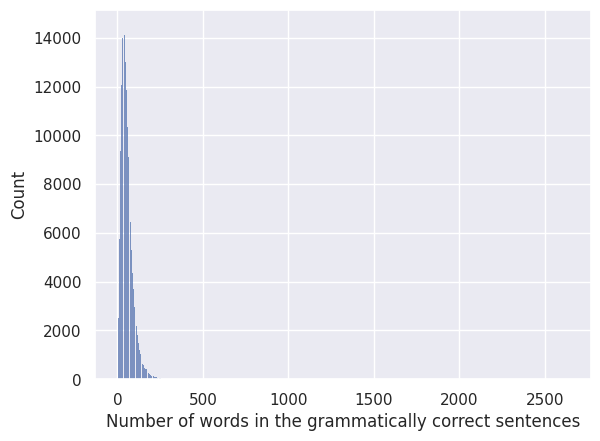

In [ ]:
sns.set_theme()
ax = sns.histplot(data=len_1)
ax.set_xlabel('Number of words in the grammatically correct sentences')

Text(0.5, 0, 'Number of words in the grammatically incorrect sentences')

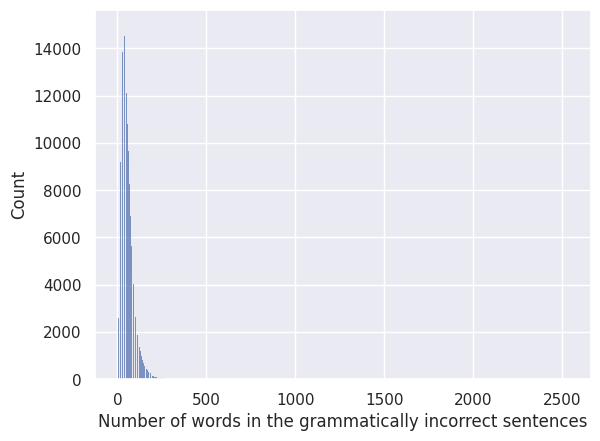

In [ ]:
sns.set_theme()
ax = sns.histplot(data=len_2)
ax.set_xlabel('Number of words in the grammatically incorrect sentences')

In [ ]:
for i in range(0, 100, 10):
  print(np.percentile(len_1,i))

0.0
20.0
28.0
35.0
41.0
48.0
56.0
66.0
79.0
101.0


In [ ]:
for i in range(0, 100, 10):
  print(np.percentile(len_2,i))

0.0
19.0
27.0
34.0
40.0
47.0
55.0
65.0
77.0
100.0


Remove sentences that:

have less than equal to 5 words
have more than or equal to 30 words
have the same error sentence and correct sentence


In [ ]:
for i, row in enumerate(final_data['error']):
  #print(i, row)
  if row.split(" ") == final_data['correct'].iloc[i].split(" ") or len(row.split(" ")) >= 15 or len(row.split(" ")) <= 5:
    final_data.iloc[i] = np.nan

In [ ]:
final_data = final_data.dropna()

In [ ]:


final_data.describe()

,error,correct
count,290261,290261
unique,289553,288198
top,This is my first writing .,This is my first diary entry .
freq,5,20


In [ ]:
final_data

,error,correct
3,And he took in my favorite subject like soccer .,And he took in my favorite subjects like soccer .
4,"Actually , who let me know about Lang - 8 was him .","Actually , he was the one who let me know about Lang - 8 . ."
6,His Kanji 's ability is much better than me .,His Kanji ability is much better than mine .
11,I heard a sentence last night when I watched TV .,I heard a sentence last night when I was watching TV .
15,"When you go uphill , you hvae to bend your back .","When you go uphill , you have to bend your back ."
...,...,...
1037536,I think it is a perfect word for expressing my yesterday .,I think it is a perfect word for describing my day yesterday .
1037539,I sometimes join a community for English - learning people .,"Occasionally , I visit a community for people learning English . ( English - learning people sounds a bit odd . )"
1037551,"I like Thailand language , because that pronounce sound cute .","I like Thai , because the pronunciation sounds cute ."
1037555,"Yesterday , I went to Umeda station to date .",I went to Umeda station for dating yesterday .


In [ ]:
#check for missing values
final_data.isna().any()

error      False
correct    False
dtype: bool

Basic preprocessing :

- Decontractions like do n't, I 'm,
- Handle : D, x D etc
- Remove brackets, remove text within it : "And I think it 's fun , right ?" "And I think it 's fun , right ? ( YEAH ! )"
Note: There is noise in the data and use of speacial characters.

ALSO BIG NOTE:

- Remove missing, duplicate values.
- Experiment w keeping same sentences (corr/incorrect)
- SHAP figures AI explanability, explore!!
- Can something be done abput the noise in the dataset

Basic Preprocessing

In [ ]:
def decontracted(phrase):

    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"gon na", " going to", phrase)
    phrase = re.sub(r"wan na", " want to", phrase)
    phrase = re.sub(r"gonna", " going to", phrase)
    phrase = re.sub(r"wanna", " want to", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub("\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)

    return phrase

def clean_text(t):

  #print(t)

  t = unicodedata.normalize('NFKD', t).encode('ascii', 'ignore').decode('ascii') #No need to normalize as text is already an  with utf-8 character set
  t = decontracted(t)

  t = re.sub(r'x D', '', t)
  t = re.sub(r': D', '', t)
  t = re.sub(r': P', '', t)

  t = re.sub(r'xD', '', t)
  t = re.sub(r':D', '', t)
  t = re.sub(r':P', '', t)

  #If brackets in text, remove text within brackets
  if '(' in t and ')' in t:
    try:
      t = re.sub(t.split("(")[-1].split(")")[0], '', t)
    except:
      pass
    #t = re.sub("(", '', t)
    #t = re.sub(")", '', t)

  #Replace all characters except these with space
  t = re.sub(r'[^A-Za-z;!?.,\-\' ]+', ' ', t)

  #If semicolon in text, remove the part after semicolon till fullstop (since we don't know if the text after semicolon is a continuation of the sentence or a new context altogether)
  #if ';' in t:
  #  t = re.sub(';', ' , ', t)

  t = re.sub(r'\.+',r' .',t)
  t = re.sub(r'\;+',r' , ',t)
  t = re.sub(r'!+',r' !',t )
  t = re.sub(r'\?+',r' ?',t )
  t = re.sub(r'\-+',r' - ',t )
  t = re.sub(r'\,+',r' , ',t )
  t = re.sub(r'\'+',r" ' ",t)
  t = re.sub(' +', ' ', t)

  return t

In [ ]:
final_data['correct'] = final_data['correct'].apply(clean_text)
final_data['error'] = final_data['error'].apply(clean_text)

In [ ]:
final_data.describe()

,error,correct
count,290261,290261
unique,288743,287000
top,,
freq,544,578


In [ ]:
final_data = final_data.drop_duplicates()
final_data = final_data.dropna()

In [ ]:
final_data.describe()

,error,correct
count,289591,289591
unique,288743,287000
top,,
freq,32,70


In [ ]:
#save it to a csv
final_data.to_csv('/content/preprocessed_15.csv', index = False)

In [ ]:
final_data = pd.read_csv('/content/preprocessed_15.csv')

In [ ]:
for i, row in enumerate(final_data['error']):
  if row.split(" ") == final_data['correct'].iloc[i].split(" "):
    final_data.iloc[i] = np.nan

In [ ]:
final_data = final_data.dropna()

In [ ]:
final_data.describe()

,error,correct
count,288060,288060
unique,287230,285510
top,,
freq,31,69


In [ ]:
final_data.to_csv('/content/final_preprocessed_15.csv', index = False)

EDA:

- Plot word clouds for both input and output sets
- Analysis of the lengths of inputs and outputs

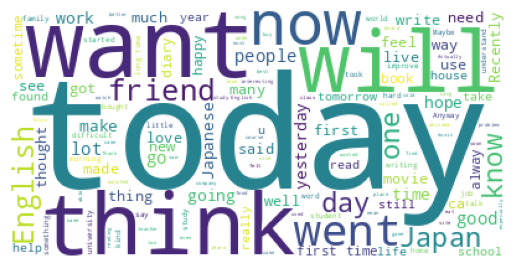

In [ ]:
text = " ".join(final_data['correct'])

WC = WordCloud(background_color="white").generate(text)

plt.imshow(WC)
plt.axis("off")
plt.show()

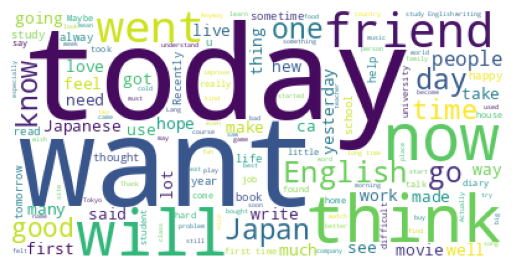

In [ ]:
text = " ".join(final_data['error'])

WC = WordCloud(background_color="white").generate(text)

plt.imshow(WC)
plt.axis("off")
plt.show()

In [ ]:
len_1 = [ len(final_data['correct'].iloc[i]) for i in range(len(final_data['correct'])) ]
len_2= [ len(final_data['error'].iloc[i]) for i in range(len(final_data['error'])) ]


Text(0.5, 0, 'Number of words in the grammatically correct sentences')

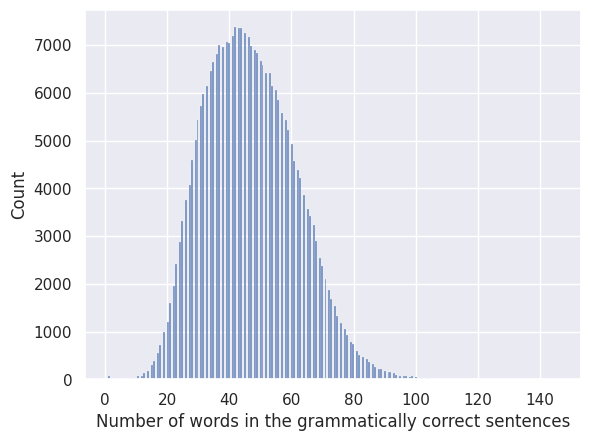

In [ ]:
sns.set_theme()
ax = sns.histplot(data=len_1)
ax.set_xlabel('Number of words in the grammatically correct sentences')

In [ ]:
sns.set_theme()
ax = sns.histplot(data=len_2)
ax.set_xlabel('Number of words in the grammatically incorrect sentences')

In [ ]:
for i in range(0, 100, 10):
  print(np.percentile(len_1,i))

In [ ]:
for i in range(0, 100, 10):
  print(np.percentile(len_2,i))

- Base Line ENCODER-DECODER Model

In [ ]:
#Import Necessary Libraries

In [ ]:
import re
import datetime
import numpy as np
import pandas as pd
import random
from tqdm import tqdm
import keras
import tensorflow as tf
from sklearn.metrics import fbeta_score
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import TensorBoard
from tensorflow.keras.layers import Embedding,LSTM, TimeDistributed, Dense, Bidirectional
from tensorflow.keras.initializers import HeNormal, GlorotNormal, GlorotUniform
from nltk.translate.bleu_score import sentence_bleu
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/final_preprocessed_15.csv')

Since preprocessing of data is already done before, all we do is add the tokens required to feed the data into our Encoder Decoder model with attention.

We implement the teacher forcing approach such that the the data looks like this:

1. Encoder input:
<start> Hello how are youz ? <end>
2. Decoder input:
<start> Hello how are you ?
3. Decoder output:
Hello how are you? <end>

- This allows the decoder to always stay one step ahead during learning.

In [ ]:
def preprocess(t, add_start_token, add_end_token):

  if add_start_token == True and add_end_token == False:
    t = '<start>'+' '+t
  if add_start_token == False and add_end_token == True:
    t = t+' '+'<end>'
  if add_start_token == True and add_end_token == True:
    t = '<start>'+' '+t+' '+'<end>'

  t = re.sub(' +', ' ', t)
  return t

In [ ]:
encoder_input = [preprocess(line, add_start_token= True, add_end_token=True) for line in data['error']]
decoder_input = [preprocess(line, add_start_token= True, add_end_token=False) for line in data['correct']]
decoder_output = [preprocess(line, add_start_token= False, add_end_token=True) for line in data['correct']]

In [ ]:
print(encoder_input[0])
print(decoder_input[0])
print(decoder_output[0])

In [ ]:
#ENCODER INPUT

tokenizer = Tokenizer(filters='', split=" ")
tokenizer.fit_on_texts(encoder_input)
word_index = tokenizer.word_index #vocabulary

max_length = max([ len(row.split(" ")) for row in encoder_input ])
INPUT_ENCODER_LENGTH = max_length

enc_input_encoded = tokenizer.texts_to_sequences(encoder_input)
enc_input_padded= pad_sequences(enc_input_encoded, maxlen=INPUT_ENCODER_LENGTH, padding="post")

print(enc_input_padded.shape)

In [ ]:
print(encoder_input[0])
print(enc_input_padded[0])

In [ ]:
#DECODER INPUT
decoder_data = decoder_input.copy()
decoder_data.extend(decoder_output)

out_tokenizer = Tokenizer(filters='', split=" ")
out_tokenizer.fit_on_texts(decoder_data)
word_index = out_tokenizer.word_index #vocabulary

max_length = max([ len(row.split(" ")) for row in decoder_input ])
INPUT_DECODER_LENGTH = max_length

In [ ]:
dec_input_encoded = out_tokenizer.texts_to_sequences(decoder_input)
dec_input_padded= pad_sequences(dec_input_encoded, maxlen=INPUT_DECODER_LENGTH, padding="post", truncating = "post")

print(dec_input_padded.shape)

In [ ]:
print(decoder_input[0])
print(dec_input_padded[0])

In [ ]:
dec_output_encoded = out_tokenizer.texts_to_sequences(decoder_output)
dec_output_padded= pad_sequences(dec_output_encoded, maxlen=INPUT_DECODER_LENGTH, padding="post", truncating = "post")

print(dec_output_padded.shape)

In [ ]:
print(decoder_output[1])
print(dec_output_padded[1])

FASTTEXT EMBEDDINGS

In [ ]:
#IMPORT THE FASTTEXT EMBEDDINGS IN THE FORM OF VECS

!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip

In [ ]:
!unzip wiki-news-300d-1M.vec.zip

Archive:  wiki-news-300d-1M.vec.zip
replace wiki-news-300d-1M.vec? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import io

def load_vectors(fname):
    fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
    n, d = map(int, fin.readline().split())
    data = {}
    for line in fin:
        tokens = line.rstrip().split(' ')
        data[tokens[0]] = np.asarray(tokens[1:])#map(float, tokens[1:])
    return data

In [ ]:
embedding_index = load_vectors('wiki-news-300d-1M.vec')

In [ ]:
word_index = tokenizer.word_index
num_tokens = len(word_index) + 2
embedding_dim = 300
hits = 0
misses = 0

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)

    if type(embedding_vector) == np.ndarray and embedding_vector.shape[0] == 300:
        embedding_matrix[i] = embedding_vector
        hits += 1

    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
np.save('/content/in_embedding.npy', embedding_matrix)

In [ ]:
word_index = out_tokenizer.word_index
num_tokens = len(word_index) + 2
embedding_dim = 300
hits = 0
misses = 0

embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)

    if type(embedding_vector) == np.ndarray and embedding_vector.shape[0] == 300:
        embedding_matrix[i] = embedding_vector
        hits += 1

    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))
np.save('/content/out_embedding.npy', embedding_matrix)

VANILLA ENCODER DECODER

In [ ]:
in_embedding_matrix = np.load('/content/in_embedding.npy')
out_embedding_matrix = np.load('/content/out_embedding.npy')
print(in_embedding_matrix.shape, out_embedding_matrix.shape)

In [ ]:
#ENCODER
class Encoder(tf.keras.Model):
    def __init__(self,inp_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        self.vocab_size = inp_vocab_size
        self.embedding_size = embedding_size
        self.lstm_units = lstm_size
        self.input_length = input_length


    def build(self, input_sequence):
        #self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.embedding_size, input_length=self.input_length,
        #                           #embeddings_initializer=keras.initializers.Constant(in_embedding_matrix), mask_zero=True,
        #                           weights = [in_embedding_matrix], mask_zero=True,
        #                           trainable = False, name="embedding_layer_encoder")
        self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.embedding_size, input_length=self.input_length,
                           mask_zero=True, name="embedding_layer_encoder")
        self.lstm = LSTM(self.lstm_units, return_state=True, return_sequences=True, name="Encoder_LSTM")

    def call(self,input_sequence,states, training = True):
        input_embedding = self.embedding(input_sequence)   #(batch_size, length of input array, embedding_size)
        self.lstm_output, self.state_h, self.state_c = self.lstm(input_embedding, initial_state = states)
        return self.lstm_output,self.state_h, self.state_c


    def initialize_states(self,batch_size):
      initializer = GlorotNormal()
      lstm_state_h = initializer(shape=(batch_size, self.lstm_units))#tf.zeros((batch_size, self.lstm_units), dtype=tf.dtypes.float32, name="Encoder_LSTM_hidden_state")
      lstm_state_c = initializer(shape=(batch_size, self.lstm_units))#tf.zeros((batch_size, self.lstm_units), dtype=tf.dtypes.float32, name="Encoder_LSTM_cell_state")
      return lstm_state_h, lstm_state_c

#DECODER
class Decoder(tf.keras.Model):
    def __init__(self,out_vocab_size,embedding_size,lstm_size,input_length):
        super().__init__()
        self.vocab_size = out_vocab_size
        self.embedding_size = embedding_size
        self.lstm_units = lstm_size
        self.input_length = input_length


    def build(self,input_sequence):
        #self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.embedding_size, input_length=self.input_length,
        #                           #embeddings_initializer=keras.initializers.Constant(out_embedding_matrix),
        #                           weights = [out_embedding_matrix], mask_zero=True,
        #                           trainable = False, name="embedding_layer_decoder")
        self.embedding = Embedding(input_dim=self.vocab_size, output_dim=self.embedding_size, input_length=self.input_length,
                           mask_zero=True, name="embedding_layer_decoder")
        self.lstm = LSTM(self.lstm_units, return_state=True, return_sequences=True, name="Decoder_LSTM")


    def call(self,input_sequence,initial_states, training = True):

        input_embedding = self.embedding(input_sequence)
        self.lstm_output, self.state_h, self.state_c = self.lstm(input_embedding, initial_state=initial_states)
        return self.lstm_output,self.state_h, self.state_c

In [ ]:
class Encoder_decoder(tf.keras.Model):

    def __init__(self, encoder_inputs_length,decoder_inputs_length, output_vocab_size):

        super().__init__()
        self.encoder = Encoder(INPUT_VOCAB_SIZE, embedding_size = 256, lstm_size= 1200 , input_length= INPUT_ENCODER_LENGTH)
        self.decoder = Decoder(OUTPUT_VOCAB_SIZE, embedding_size = 256, lstm_size = 1200, input_length = None)
        self.dense = Dense(output_vocab_size)#, activation = 'softmax')

    def call(self,data):
        input, output = data[0], data[1]
        states = self.encoder.initialize_states(input.shape[0])
        encoder_output,encoder_final_state_h,encoder_final_state_c = self.encoder(input, states)
        decoder_output,decoder_state_h,decoder_state_c = self.decoder(output,[encoder_final_state_h,encoder_final_state_c])
        outputs = self.dense(decoder_output)

        return outputs

In [ ]:
INPUT_VOCAB_SIZE = len(list(tokenizer.word_index)) +1 #for zero padding +OOV
OUTPUT_VOCAB_SIZE = len(list(out_tokenizer.word_index)) +1 #for zero padding + OOV
BATCH_SIZE = 16
print(INPUT_VOCAB_SIZE, INPUT_ENCODER_LENGTH, OUTPUT_VOCAB_SIZE, INPUT_DECODER_LENGTH, BATCH_SIZE)


Prepare data for feeding to model

In [ ]:
NUMBER_OF_DATAPOINTS = 10000

tf.random.set_seed(32)

encoder_input_datatset = tf.data.Dataset.from_tensor_slices(enc_input_padded)
decoder_input_datatset = tf.data.Dataset.from_tensor_slices(dec_input_padded)
decoder_output_datatset = tf.data.Dataset.from_tensor_slices(dec_output_padded)

full_dataset =  tf.data.Dataset.zip( ((encoder_input_datatset.take(NUMBER_OF_DATAPOINTS), decoder_input_datatset.take(NUMBER_OF_DATAPOINTS)), decoder_output_datatset.take(NUMBER_OF_DATAPOINTS) ) ).shuffle(1000) #encoder_input_datatset.take(NUMBER_OF_DATAPOINTS).repeat(2)


In [ ]:
test_dataset = full_dataset.take(50).batch(32)
train_dataset = full_dataset.skip(50).batch(32)

print(train_dataset, test_dataset)

In [ ]:
def scheduler(epoch, lr):
   if epoch < 1:
     return lr
   else:
     return lr * tf.math.exp(-0.1)
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

#EARLY STOPPING
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=1)

#TENSORBOARD PLOTS
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir='logs')

#SAVE MODEL WEIGHTS
class SaveModel(tf.keras.callbacks.Callback):

  def __init__(self):
    self.history = { 'loss' : [],  'val_loss' : []}
    self.init = 0

  def on_epoch_end(self, epoch, logs = {}):

    self.history['loss'].append(logs.get('loss'))
    if logs.get('val_loss', -1) != -1:
        self.history['val_loss'].append(logs.get('val_loss'))

    #if epochs % 10 == 0:
    self.model.save_weights('/content/ENC_DEC_EMB/weights_{}.h5'.format(epoch+self.init))    #print('Saved weights for epoch {}!'.format(epoch))

    df = pd.DataFrame(columns = ['loss','val_loss'])
    for col in df.columns:
      df[col] = self.history[col]
    df.to_csv('history.csv')
    !cp history.csv "'/content/ENC_DEC_EMB/history.csv"

save_model = SaveModel()

In [ ]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none'
)


def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_mean(loss_)

In [ ]:
'''This code calculates the macro averaged fbeta score for each data point and outputs the mean of 32 scores'''

def f_beta_score(y_true, y_pred):
  y_pred_sparse = tf.convert_to_tensor(np.argmax(y_pred, axis = -1), dtype = tf.float32)
  fb_score = [ fbeta_score(y_true[i], y_pred_sparse[i],average = 'macro',beta = 0.5) for i in range(y_true.shape[0])]#tf.py_function(fbeta_score, inp = [y, y_pred, 0.5], Tout=tf.float32)
  return sum(fb_score)/len(fb_score)

In [ ]:
tf.config.run_functions_eagerly(True)

#Create an object of encoder_decoder Model class,
# Compile the model and fit the model
input = np.random.randint(0, 64, size=(BATCH_SIZE, INPUT_ENCODER_LENGTH))
output = np.random.randint(0, 64, size=(BATCH_SIZE, INPUT_DECODER_LENGTH))
target = np.random.randint(0, 64, size=(BATCH_SIZE, INPUT_DECODER_LENGTH))#tf.keras.utils.to_categorical(output, OUTPUT_VOCAB_SIZE)

model = Encoder_decoder(encoder_inputs_length = INPUT_ENCODER_LENGTH, decoder_inputs_length =INPUT_DECODER_LENGTH, output_vocab_size= OUTPUT_VOCAB_SIZE)
#model = encoder_decoder(enc_units = 1024, dec_units = 1024, scoring_func = 'dot', att_units = 1024)
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=loss_function, metrics = [f_beta_score])#tf.keras.metrics.categorical_crossentropy)
model.fit([input, output], target, steps_per_epoch=1)

model.summary()

WITH FASTTEXT EMBEDDINGS

In [ ]:
#TEST1 1200 encoder decoder att units  #10000
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 50,
          callbacks = [early_stopping,tensorboard_cb, save_model])

WITHOUT FASTTEXT EMBEDDINGS

In [ ]:
#TEST1 1200 encoder decoder att units  #1000
model.fit(train_dataset,
          validation_data = test_dataset,
          epochs = 50,
          callbacks = [early_stopping,tensorboard_cb, save_model])

In [ ]:
model.load_weights('/content/ENC_DEC_EMB/weights_24_best.h5')

In [ ]:
#Input processor
def input_processor(input_sentence, pad_seq):

  #Preprocess to remove unwanted characters and convert to ASCII characters
  encoder_input = preprocess(input_sentence, add_start_token= True, add_end_token=True)

  #Convert to sequence
  tokenized_text = tokenizer.texts_to_sequences([encoder_input])
  if pad_seq == True:
    tokenized_text = pad_sequences(tokenized_text, maxlen=INPUT_ENCODER_LENGTH, padding="post")

  tokenized_text = tf.convert_to_tensor(tokenized_text, dtype = tf.float32)
  return tokenized_text


def remove_end_token(words):
  words_list = words.split(' ')[:-1]
  words = " ".join(words_list)
  return words

In [ ]:
def predict(input_sentence):
  input = input_processor(input_sentence, pad_seq = False)

  INPUT_LENGTH = input.shape[0] #Or number of inputs

  states = model.layers[0].initialize_states(INPUT_LENGTH)

  encoder_output,encoder_final_state_h,encoder_final_state_c = model.layers[0](input, states)
  states = [encoder_final_state_h,encoder_final_state_c]  #States to initialize Decoder with

  input_decoder = np.zeros((1,1))
  input_decoder[0][0] = 2  #<start> for eng vocab

  decoder_output_list = []
  stop = False

  while stop != True :

    decoder_output, dec_final_state_h, dec_final_state_c = model.layers[1](input_decoder, states)

    states = [dec_final_state_h, dec_final_state_c]

    output = model.layers[2](decoder_output)

    index = np.argmax(output, -1)
    decoder_output_list.append(index)
    input_decoder = index

    if index[0][0] == 4 :#or len(decoder_output_list) > input.shape[1]: #Index of <end> for out_tokenizer
      stop =True

  #Get the output tokens and store in arr_out
  arr_out = [int(np.asarray(i)[0][0]) for i in decoder_output_list]

  #Convert to text
  output_words = out_tokenizer.sequences_to_texts([arr_out])

  return output_words

In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html

#Pick 1000 random indices
indices = [random.randint(0, 10000) for i in range(1000)]
sent_list = [data['error'].iloc[i] for i in indices]
bleu_scores_ = []
actual_output = []
output_sent_list = []

print(sent_list)

#Translate and calculate BLEU scores
for i, sent in enumerate(tqdm(sent_list)):
  out = predict(sent)
  actual_ = decoder_output[indices[i]]

  output_sent_list.append(out[0])
  actual_output.append(actual_)

  #Remove <end> token
  out_words = remove_end_token(out[0])
  actual_output_ = remove_end_token(actual_)

  #Calculate BLEU scores
  bleu_scores_.append(sentence_bleu(actual_output_.split(' '), out_words.split(' ')))


print('Average BLEU score :',sum(bleu_scores_)/len(bleu_scores_))

In [ ]:
df = pd.DataFrame(columns= ['input_sentence', 'actual_output','translated_output', 'bleu_score'])
df['input_sentence'] = sent_list
df['actual_output'] = actual_output
df['translated_output'] = output_sent_list
df['bleu_score'] = bleu_scores_

Without FastText embeddings (for comparison)

In [ ]:
model.load_weights('drive/MyDrive/GEC/ENC_DEC/weights_49_.h5')

In [ ]:
# Predict on 1000 random sentences on test data and calculate the average BLEU score of these sentences.
# https://www.nltk.org/_modules/nltk/translate/bleu_score.html

#Pick 1000 random indices
indices = [random.randint(0, 10000) for i in range(1000)]
sent_list = [data['error'].iloc[i] for i in indices]
bleu_scores_ = []
actual_output = []
output_sent_list = []

print(sent_list)

#Translate and calculate BLEU scores
for i, sent in enumerate(tqdm(sent_list)):
  out = predict(sent)
  actual_ = decoder_output[indices[i]]

  output_sent_list.append(out[0])
  actual_output.append(actual_)

  #Remove <end> token
  out_words = remove_end_token(out[0])
  actual_output_ = remove_end_token(actual_)

  #Calculate BLEU scores
  bleu_scores_.append(sentence_bleu(actual_output_.split(' '), out_words.split(' ')))


print('Average BLEU score :',sum(bleu_scores_)/len(bleu_scores_))

In [ ]:
df = pd.DataFrame(columns= ['input_sentence', 'actual_output','translated_output', 'bleu_score'])
df['input_sentence'] = sent_list
df['actual_output'] = actual_output
df['translated_output'] = output_sent_list
df['bleu_score'] = bleu_scores_